# Supernodes - example usage

In [1]:
method_title = 'Supernodes Coarse Graining'

## Imports

In [2]:
import os
# If you are running this from ~/python_scripts/mycode.py
# change directory to the root of the repository
# All utils assume that the working directory is the root directory of the github folder
os.chdir('../') # ONLY DO ONCE!!!!

In [3]:
import sys
# Add utils directory in the list of directories to look for packages to import
sys.path.insert(0, os.path.join(os.getcwd(),'utils'))

In [4]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
# local utils
from supernodes import supernodes
from mapping_auxiliary_functions import *

In [5]:
from visualization_networkx import *

## Example (KC) with detailed information on the method

### Load graph

In [6]:
# make an example network
if True:
    # load karate club graph
    G_micro = G = nx.karate_club_graph()
else:
    # load graph from weighted edge list
    # weighted_edgelist = .......
    # G_micro = nx.from_pandas_edgelist(weighted_edgelist, edge_attr='weight') 
    # OR OTHER, e.g. from Ref [1] Yanghua Xiao, Ben D MacArthur, Hui Wang, Momiao Xiong, and Wei Wang. “Network quotients: Structural skeletons of complex systems”. In: Physical Review E 78.4 (2008), p. 046102. doi: 10.1103/PhysRevE.78.046102.
    G = nx.read_pajek('./data/PhD.paj')
    # some preprocessing
    G = G.to_undirected()
    nx.relabel_nodes(G, mapping={n:i for i,n in enumerate(G.nodes)},copy=False)
    for v in G.nodes:
        del G.nodes[v]['shape']

### Run method

In [7]:
# the function causal_emergence returns the mapping of the nodes from microscale to macroscale as a table (pandas columns: micro, macro), and the weighted_edgelist as another table (pandas columns: )
mapping, G_macro = supernodes(G,k=5)

In [8]:
print('Original number of nodes =', G.number_of_nodes())
print('Original number of edges =', G.number_of_edges())
print('Coarse-grained number of nodes =', G_macro.number_of_nodes())
print('Coarse-grained number of edges =', G_macro.number_of_edges())

Original number of nodes = 34
Original number of edges = 78
Coarse-grained number of nodes = 6
Coarse-grained number of edges = 10


### See output variables
(for reference of how your output should look like)

In [9]:
# Let's take a look at the resulting mapping. All values of size > largest node id are macronodes.
mapping

,micro,macro
0,0,0
1,1,1
2,2,2
3,3,34
4,4,34
5,5,34
6,6,34
7,7,34
8,8,34
9,9,34


### Visualization
This visualization shows the micro and macro networks side by side, with edge weidhts 

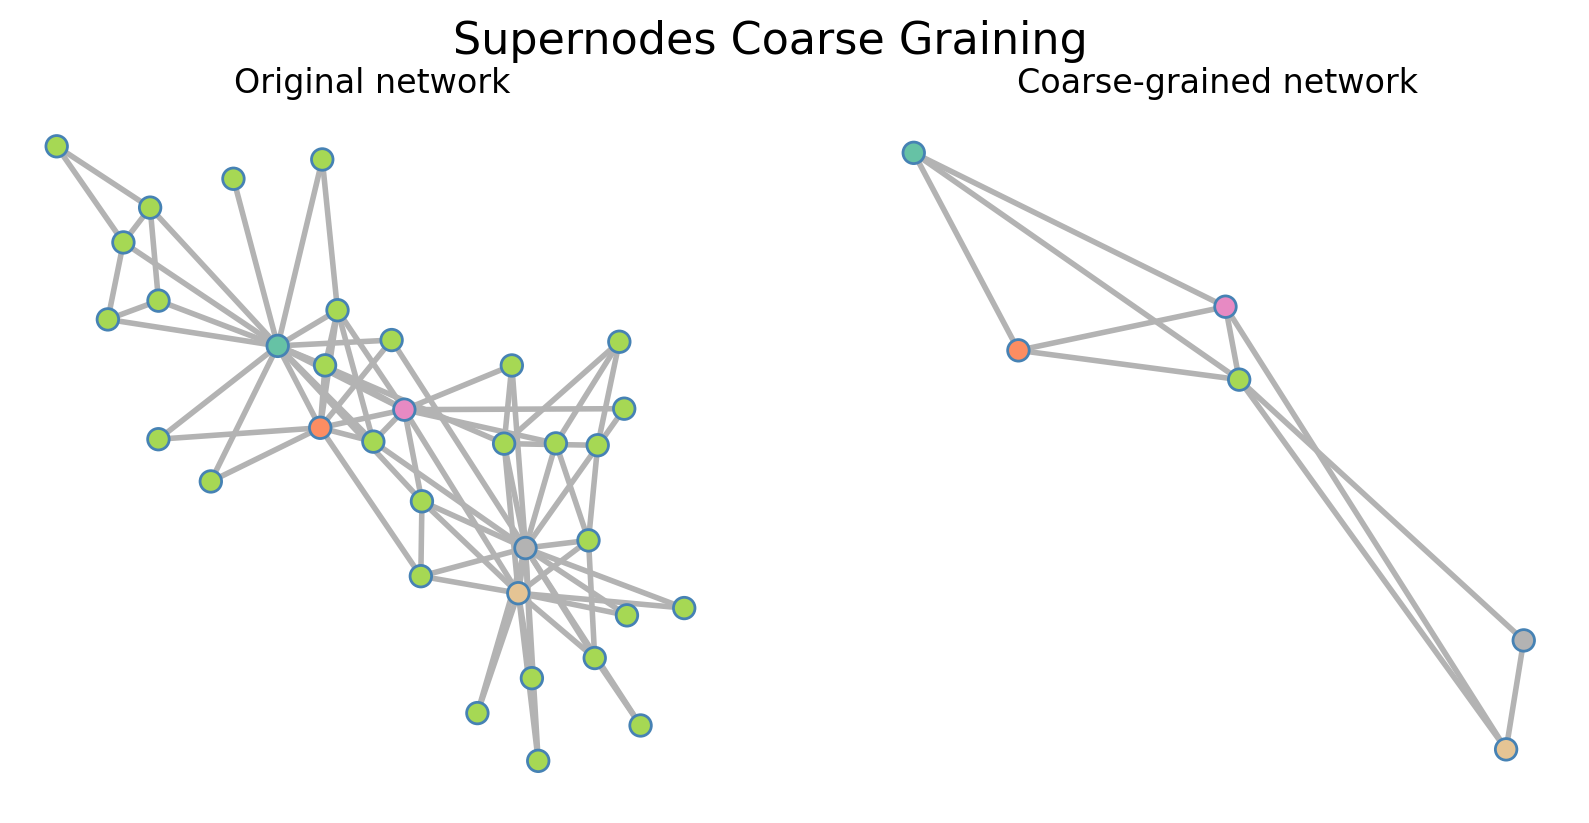

<Figure size 640x480 with 0 Axes>

In [10]:
visualize_micro_macro(G, mapping, G_macro, all_colorful = True, method_title=method_title, 
                      name_file = f'KC_colorful_{method_title}', file_format='png')